In [2]:
MODEL_NAME = "runwayml/stable-diffusion-v1-5"

In [14]:
# Importing libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

In [5]:
# Downloading pretrained model
pipeline = StableDiffusionPipeline.from_pretrained(MODEL_NAME, revision='fp16', dtype=torch.float16)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [6]:
# Send the model to GPU
device = torch.device("cuda:0")
pipeline_runway = pipeline.to(device)

In [12]:
'''Prompts to send to Stable Diffusion model. 
   Here, we use only one word for prompting since we compare the model's output with classes on 
   ImageNet-1k real image dataset
   
  Tip: A more sophisticated prompt leads to the generation of higher quality images.'''
  
prompts = [
    "cat",
    "cat",
    "dog",
    "dog",
    "hen",
    "kite",
    "peacock",
    "folding chair", 
    "desk",
    "desk"
    ]

In [9]:
images = pipeline_runway(prompts, num_images_per_prompt=1, output_type="numpy").images

  0%|          | 0/50 [00:00<?, ?it/s]

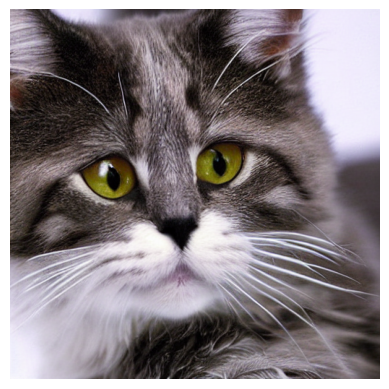

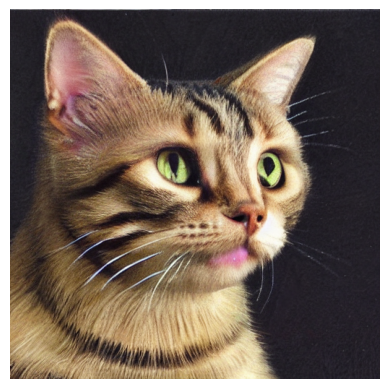

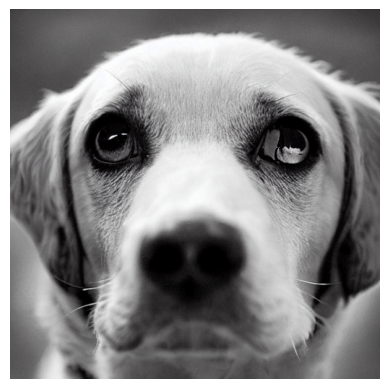

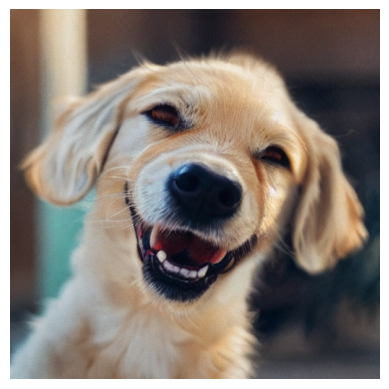

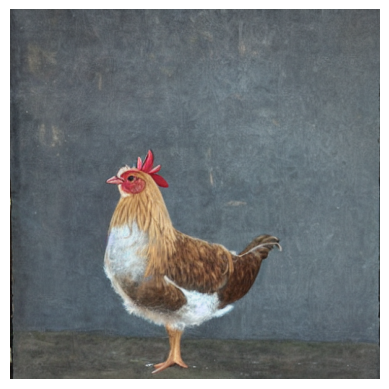

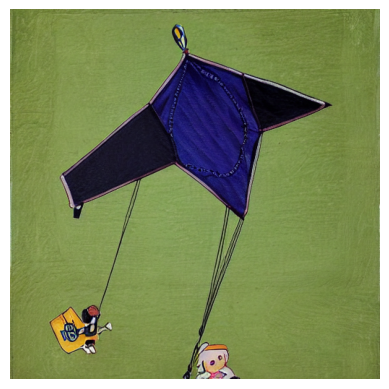

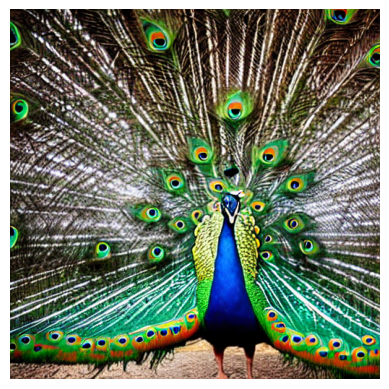

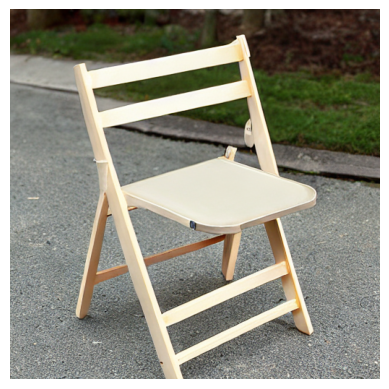

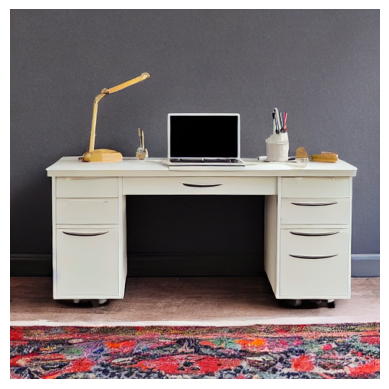

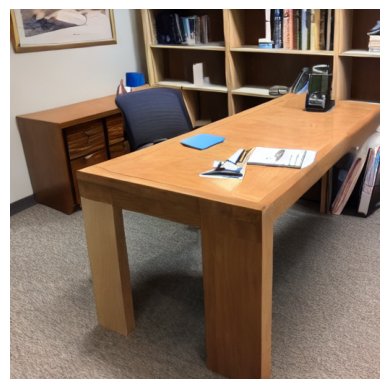

In [16]:
# Display the NumPy array as an image using Matplotlib
for i in range(images.shape[0]):
    plt.imshow(images[i])
    plt.axis('off')  # Turn off axes
    plt.show()